# Part 2: Life Expectancy prediction

In [ ]:
!pip install -q kaggle 
from google.colab import files

In [ ]:
files.upload()

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


{'Life Expectancy Data.csv': b"Country,Year,Status,Life expectancy ,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles , BMI ,under-five deaths ,Polio,Total expenditure,Diphtheria , HIV/AIDS,GDP,Population, thinness  1-19 years, thinness 5-9 years,Income composition of resources,Schooling\r\nAfghanistan,2015,Developing,65,263,62,0.01,71.27962362,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1\r\nAfghanistan,2014,Developing,59.9,271,64,0.01,73.52358168,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10\r\nAfghanistan,2013,Developing,59.9,268,66,0.01,73.21924272,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.47,9.9\r\nAfghanistan,2012,Developing,59.5,272,69,0.01,78.1842153,67,2787,17.6,93,67,8.52,67,0.1,669.959,3696958,17.9,18,0.463,9.8\r\nAfghanistan,2011,Developing,59.2,275,71,0.01,7.097108703,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5\r\nAfghanistan,2010,Developing,58.8,279,74,

In [ ]:
q2train = pd.read_csv("/content/Life Expectancy Data.csv")
q2train.shape

(2938, 22)

In [ ]:
print("All columns are :", list(q2train.columns))

All columns are : ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
q2train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
q2train.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
q2train.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
q2train.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Q.1 HANDELING NULL VALUES

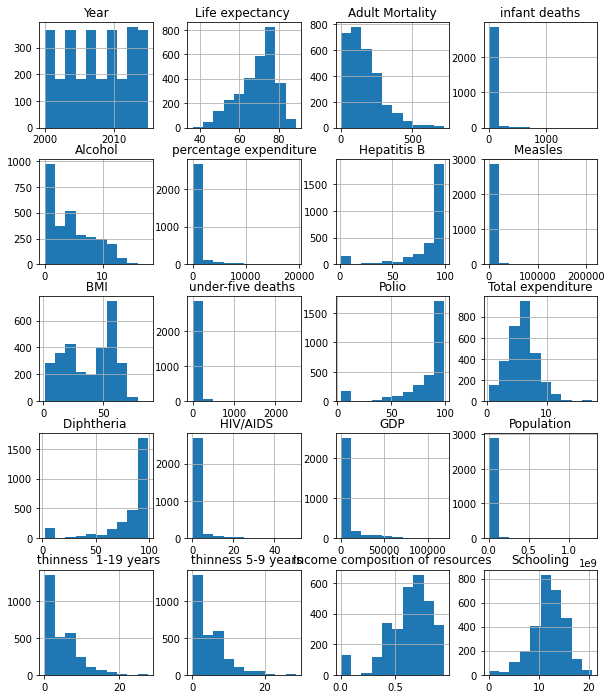

In [ ]:
q2train.hist(layout=(5,4), figsize=(10,12))

plt.show()

In [ ]:
#imputing which among mean,median ,mode to use to imppute missing values
# From the boxplotwe can observe that the data is skewed as there are several data points that act as outliers. In this case, mean is not a good methid. Median or mode can be used 
# toreplace missing values
	
q2train['Hepatitis B'].fillna(q2train['Hepatitis B'].mode()[0],inplace = True)
q2train['Alcohol'].fillna(q2train['Alcohol'].mean(),inplace = True)
q2train['Population'].fillna(q2train['Population'].median(),inplace = True)
q2train['GDP'].fillna(q2train['GDP'].median(),inplace = True)
q2train['Total expenditure'].fillna(q2train['Total expenditure'].mean(),inplace = True)
q2train['Income composition of resources'].fillna(q2train['Income composition of resources'].mean(),inplace = True)
q2train['Schooling'].fillna(q2train['Schooling'].mean(),inplace = True)
q2train[' thinness  1-19 years'].fillna(q2train[' thinness  1-19 years'].mode()[0],inplace = True)
q2train[' thinness 5-9 years'].fillna(q2train[' thinness 5-9 years'].mode()[0],inplace = True)
q2train['Diphtheria '].fillna(q2train['Diphtheria '].mode()[0],inplace = True)
q2train['Polio'].fillna(q2train['Polio'].mode()[0],inplace = True)
q2train[' BMI '].fillna(q2train[' BMI '].mode()[0],inplace = True)
q2train['Adult Mortality'].fillna(q2train['Adult Mortality'].median(),inplace = True)
q2train['Life expectancy '].fillna(q2train['Life expectancy '].mean(),inplace = True)

In [ ]:
q2train.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#CHLOROPLETH MAPS

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# create figure
fig = px.choropleth(q2train,
                    locations='Country', 
                    locationmode="country names", 
                    color='Life expectancy ',
                    animation_frame="Year",
                    animation_group='Country',
                    color_continuous_scale="Viridis_r", 
                    )
fig.update_layout(title_text='Life expectancy of different countries', title_x=0.5)
fig.show()

In [ ]:
# create figure
fig = px.choropleth(q2train,
                    locations='Country', 
                    locationmode="country names", 
                    color='Schooling',
                    animation_frame="Year",
                    animation_group='Country',
                    color_continuous_scale="Viridis_r", 
                    )
fig.update_layout(title_text='Life expectancy of different countries', title_x=0.5)
fig.show()

We observe that countries in African continent have relatively low life expectancy and are also less developed.
developed countries have better life expectancy. 
Countries such as Finland,Germany,Australia have high life expectancy. These are also the countries which have high Schooling. So increase in schooling is leading to high life expectancy

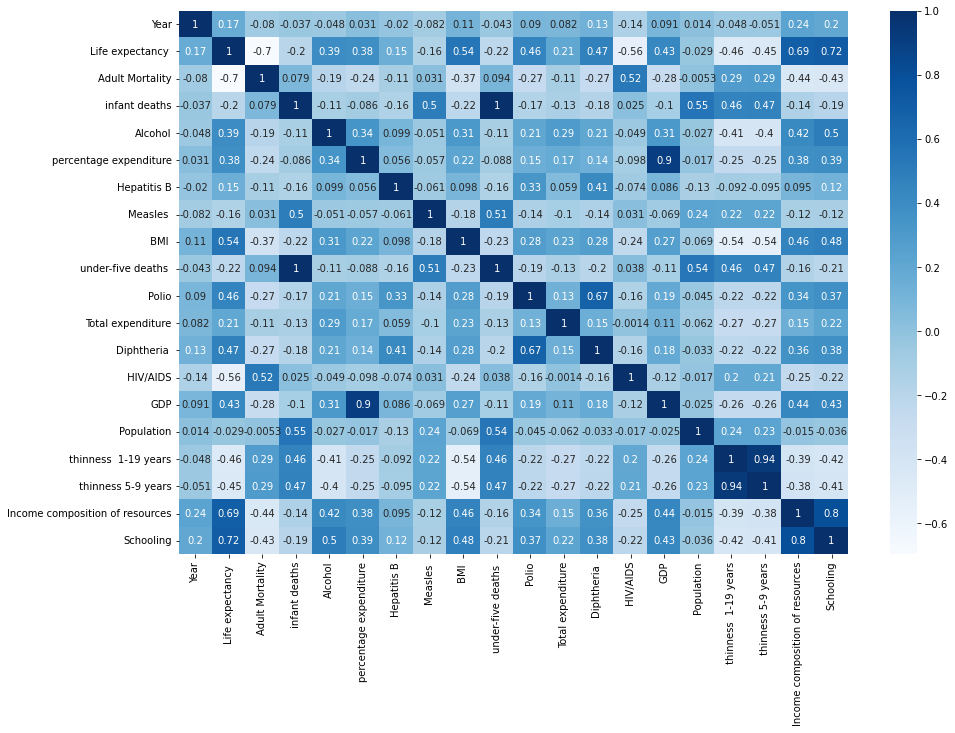

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(q2train.corr(),annot=True,cmap='Blues')
plt.show()

this shows the corelation between life expectancy and various other features:
1. Alcohol: 0.39 (positive)
2. Schooling : 0.72(positive)
3. Adult mortaility : -0.7(negative)
4. Infant deaths : -0.2 (negative)
5. Population: -0.029 (negative)
6. percentage expenditure : 0.38 (positive)

In [ ]:
less_expectancy=q2train[q2train['Life expectancy ']<65]

px.scatter(less_expectancy,x='Life expectancy ',y='percentage expenditure',color='Country',size='Life expectancy ',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus percentage expenditure')

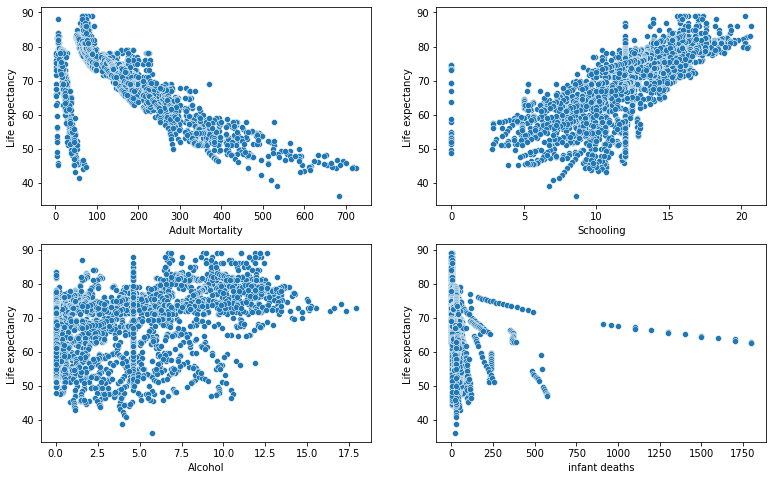

In [ ]:
fig, axes = plt.subplots(2, 2)


sns.scatterplot(data=q2train, x="Adult Mortality", y="Life expectancy ", ax=axes[0,0])
sns.scatterplot(data=q2train, x="Schooling", y="Life expectancy ", ax=axes[0,1])
sns.scatterplot(data=q2train, x="Alcohol", y="Life expectancy ", ax=axes[1,0])
sns.scatterplot(data=q2train, x="infant deaths", y="Life expectancy ", ax=axes[1,1])

fig.set_size_inches(13, 8)
plt.show()

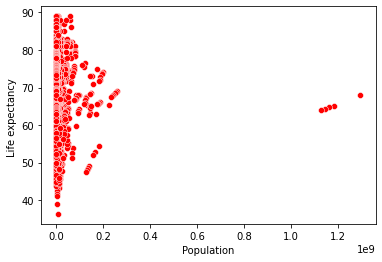

In [ ]:
sns.scatterplot(data=q2train, x="Population", y="Life expectancy ",color="red")

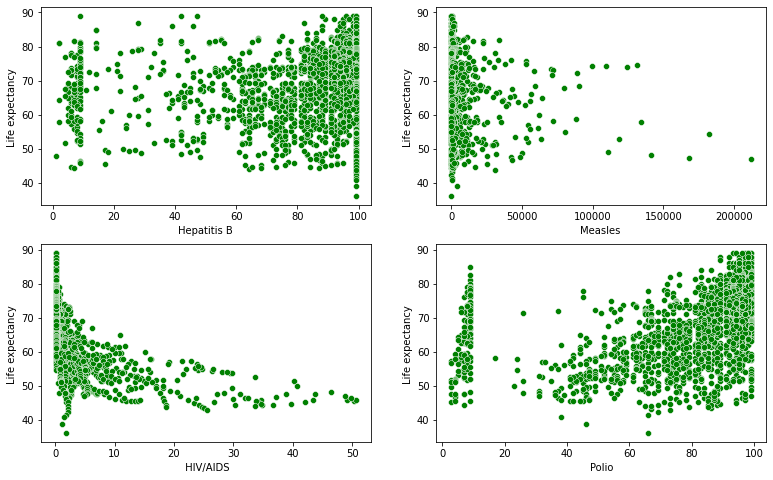

In [ ]:
fig, axes = plt.subplots(2, 2)


sns.scatterplot(data=q2train, x="Hepatitis B", y="Life expectancy ",color="green", ax=axes[0,0])
sns.scatterplot(data=q2train, x="Measles ", y="Life expectancy ",color="green", ax=axes[0,1])
sns.scatterplot(data=q2train, x=" HIV/AIDS", y="Life expectancy ",color="green", ax=axes[1,0])
sns.scatterplot(data=q2train, x="Polio", y="Life expectancy ",color="green", ax=axes[1,1])

fig.set_size_inches(13, 8)
plt.show()

#DISTRIBTUTION ANALYSIS

In [ ]:
# The Null hypothesis used here assumes that the numbers follow the normal distribution.
# If we choose a significance level of 5%; that is, we will reject the null hypothesis if the p-value is less than 0.05.

from scipy.stats import kstest

train2_copy=q2train.copy()
train2_copy=train2_copy.drop(['Country', 'Status'], axis=1)
train2_copy.head()

for i in train2_copy:
  x = kstest(train2_copy[i], 'norm')  
  print(i,": ",x)


#since all the columns have their p-value as less than 0.05 so none of them is close to normal

Year :  KstestResult(statistic=1.0, pvalue=0.0)
Life expectancy  :  KstestResult(statistic=1.0, pvalue=0.0)
Adult Mortality :  KstestResult(statistic=0.9918427500282746, pvalue=0.0)
infant deaths :  KstestResult(statistic=0.5722124276161502, pvalue=0.0)
Alcohol :  KstestResult(statistic=0.6397660548769124, pvalue=0.0)
percentage expenditure :  KstestResult(statistic=0.765922478906687, pvalue=0.0)
Hepatitis B :  KstestResult(statistic=0.998266490773143, pvalue=0.0)
Measles  :  KstestResult(statistic=0.607270290107641, pvalue=0.0)
 BMI  :  KstestResult(statistic=0.9811967335850476, pvalue=0.0)
under-five deaths  :  KstestResult(statistic=0.58718860188436, pvalue=0.0)
Polio :  KstestResult(statistic=0.9986501019683699, pvalue=0.0)
Total expenditure :  KstestResult(statistic=0.9316014702046477, pvalue=0.0)
Diphtheria  :  KstestResult(statistic=0.9983097343713652, pvalue=0.0)
 HIV/AIDS :  KstestResult(statistic=0.539827837277029, pvalue=0.0)
GDP :  KstestResult(statistic=0.9995457064126058,

#SCALING

In [ ]:
train2=q2train.copy()
scaler = StandardScaler()
train_scaled=scaler.fit_transform(train2[['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']]) 
train2_final=pd.DataFrame(train_scaled,columns=['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling'])
train2_final_y=train2['Life expectancy ']
train2_final.head()


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,0.792119,0.268824,-1.172958,-0.335570,-0.817378,-0.110384,-0.970757,0.255359,-3.277971,0.925806,-0.736338,-0.323445,-0.453371,0.435183,2.810992,2.771121,-0.725401,-0.579931
1,1.404986,0.856601,0.285786,-1.172958,-0.334441,-0.944171,-0.168124,-0.995706,0.274060,-1.054359,0.934140,-0.863060,-0.323445,-0.451232,-0.183349,2.878974,2.815546,-0.740050,-0.610570
2,1.188210,0.832421,0.302749,-1.172958,-0.334594,-0.859642,-0.173531,-1.020655,0.292761,-0.883312,0.913306,-0.778579,-0.323445,-0.449799,0.398066,2.924295,2.859970,-0.769349,-0.641209
3,0.971434,0.864662,0.328193,-1.172958,-0.332096,-0.732849,0.032045,-1.045604,0.317696,-0.669503,1.075815,-0.651856,-0.323445,-0.446924,-0.120968,2.969617,2.926607,-0.803531,-0.671847
4,0.754658,0.888843,0.345155,-1.172958,-0.367862,-0.690585,0.051757,-1.065563,0.342631,-0.626741,0.804966,-0.609616,-0.323445,-0.492539,-0.134268,3.037599,2.971032,-0.847480,-0.763764


#PIPELINE

In [ ]:
#building a pipeline
train2_2=pd.read_csv("/content/Life Expectancy Data.csv")

In [ ]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
#change NULL values
class change_null(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
            
    # Transform updates all NaN values with median
    def transform(self, X):
        X['Hepatitis B'].fillna(X['Hepatitis B'].mode()[0],inplace = True)
        X['Alcohol'].fillna(X['Alcohol'].mean(),inplace = True)
        X['Population'].fillna(X['Population'].median(),inplace = True)
        X['GDP'].fillna(X['GDP'].median(),inplace = True)
        X['Total expenditure'].fillna(X['Total expenditure'].mean(),inplace = True)
        X['Income composition of resources'].fillna(X['Income composition of resources'].mean(),inplace = True)
        X['Schooling'].fillna(X['Schooling'].mean(),inplace = True)
        X[' thinness  1-19 years'].fillna(X[' thinness  1-19 years'].mode()[0],inplace = True)
        X[' thinness 5-9 years'].fillna(X[' thinness 5-9 years'].mode()[0],inplace = True)
        X['Diphtheria '].fillna(X['Diphtheria '].mode()[0],inplace = True)
        X['Polio'].fillna(X['Polio'].mode()[0],inplace = True)
        X[' BMI '].fillna(X[' BMI '].mode()[0],inplace = True)
        X['Adult Mortality'].fillna(X['Adult Mortality'].median(),inplace = True)
        X['Life expectancy '].fillna(train2['Life expectancy '].mean(),inplace = True)
        return X

In [ ]:
#scaling
class scaling(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
            
    # Transform updates all NaN values with median
    def transform(self, X):
      categorical_data=X[['Country','Status']]
      scaler = StandardScaler()
      train_scaled=scaler.fit_transform(X[['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']]) 
      # train2_final=pd.DataFrame(train_scaled,columns=['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling'])
      y_train=X['Life expectancy ']
      return train_scaled,y_train,categorical_data

In [ ]:
pre_pipe = Pipeline([
    ('dropna', change_null()),
    ('scaling',scaling())
])

x_train,y_train,categorical_data= pre_pipe.fit_transform(train2_2)


#K FOLD CROSS VALIDATION

In [ ]:
from statistics import mean 
#k fold validation

#we will assume k to be 5 as the data set is quite large
k=10
x = int(x_train.shape[0] / k)   # x is the size of each fold
y_train=np.array(y_train)                                                          

RMSE_kfold=[]
r2_kfold=[] 
for i in range(k):
  x_copy=x_train
  y_copy=y_train

  fold_x=x_copy[x*i:x*(i+1)] 
  rest_data_x=np.delete(x_copy,slice(x*i, x*(i+1)),0) 

  fold_y=y_copy[x*i:x*(i+1)]
  rest_data_y=np.delete(y_copy,slice(x*i, x*(i+1)),0) 

  linear.fit(rest_data_x,rest_data_y)
  y_predict = linear.predict(fold_x)
  r2_kfold.append(r2_score(fold_y, y_predict)) 
  RMSE_kfold.append(mean_squared_error(fold_y, y_predict, squared=False))

rmse_mean=mean(RMSE_kfold) 
r2_mean=mean(r2_kfold)
print("RMSE: ",RMSE_kfold)
print("r2: ",r2_kfold)
print("AVG RMSE: ",rmse_mean)
print("AVG r2: ",r2_mean)

RMSE:  [4.131614482960601, 4.759517563317284, 3.5867364394992505, 4.2494621419000165, 3.9223624787561024, 4.1393814674644185, 4.697740525967428, 5.248372223574162, 4.186490814868722, 4.09359743585052]
r2:  [0.7649235367759669, 0.8182284342015798, 0.8251830875449266, 0.7978829615438356, 0.7256253115081898, 0.8206433365582378, 0.7534055729733132, 0.6353518933021371, 0.8374859579801092, 0.7637843605183744]
AVG RMSE:  4.3015275574158505
AVG r2:  0.774251445290667


#FEATURE SELECTION

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold


In [ ]:
x_train2_split, x_test2_split, y_train2_split, y_test2_split = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [ ]:
names = ['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']

In [ ]:
# Create a function called lasso,
def lasso(alphas):
 
    df = pd.DataFrame()
    df['Feature Name'] = names
    
    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(x_train, y_train)
        
        # Create a column name for that alpha value
        column_name = 'alpha : %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the dataframe    
    return df

In [ ]:
lasso([.0001,.1, .5, 6])

#In feature selection, after shrinkage, every non-zero value of co-eff is selected to be used in the model
#In this we observe that as alpha increase, the corresponding co-eff values of the feautures reduces, so features importance is reduced. 
#This is denoted by zero value given in above tables.

#For eg: when alpha=0.5 : Year,infant deaths,Hepatitis B,Measles,under-five deaths,Total expenditure,Population,thinness 5-9 years have regression coeeficients 0 so theu are not important

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+04, tolerance: 2.655e+01



,Feature Name,alpha : 0.000100,alpha : 0.100000,alpha : 0.500000,alpha : 6.000000
0,Year,-0.123047,-0.000000,0.000000,0.000000
1,Adult Mortality,-2.516352,-2.569877,-2.496616,-0.336124
2,infant deaths,11.554215,-0.000000,-0.000000,-0.000000
3,Alcohol,0.467260,0.290006,0.076483,0.000000
4,percentage expenditure,0.135461,0.194895,0.060798,0.000000
5,Hepatitis B,-0.355461,-0.247501,-0.000000,0.000000
6,Measles,-0.230311,-0.225825,-0.000000,-0.000000
7,BMI,0.818515,0.827749,0.765675,0.000000
8,under-five deaths,-11.754073,-0.130842,-0.000000,-0.000000
9,Polio,0.664490,0.691152,0.540344,0.000000


##B) OLS

In [ ]:
import statsmodels.api as sm
model = sm.OLS(train2_final_y,train2_final)
results = model.fit()

In [ ]:
print(results.summary())

# here we check the p values. If the p value for a feature is greater than the significance(5%) ie. 0.05 they that feature is considered as insignificant.
# In this case:
# Year,Alcohol, percentage expenditure, Hepatitis B,Measles,BMI, Polio,Total expenditure,Diphtheria,GDP,Population,thinness  1-19 years,thinness  5-9 years are very less significant

                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              2.363
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                    0.000759
Time:                        10:15:35   Log-Likelihood:                         -16623.
No. Observations:                2938   AIC:                                  3.328e+04
Df Residuals:                    2919   BIC:                                  3.340e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

##C) Scikit learn library

In [ ]:
from sklearn.feature_selection import RFE
linear = LinearRegression()

rfe = RFE(linear, n_features_to_select=10)
rfe=rfe.fit(train2_final, train2_final_y)

df2= pd.DataFrame()
df2['Feature Name'] = names
df2['Ranking']=rfe.ranking_

#we will sort the features based on ranking(more significant have higher ranking)
df2.sort_values(by=['Ranking'])

#as the number of features to be selected is set as 1,the top 10 elements
#have value 1 are selected

,Feature Name,Ranking
18,Schooling,1
1,Adult Mortality,1
2,infant deaths,1
3,Alcohol,1
13,GDP,1
12,HIV/AIDS,1
11,Diphtheria,1
7,BMI,1
8,under-five deaths,1
17,Income composition of resources,1


B. Yes, those countries should focus on health expenditure

C. Life expectancy decreases with increase in adult mortality rate and vice-versa. 

High infant mortality is leading to a decrease in life expectancy.

D. According to the graphs, Life expectancy has a positive corelation with Alcohol.

E. Schooling has the highest positive corelation with Life expectancy. is the the most important parameter. With increase in Schooling, the Life expectancy is increasing.

F.  Life expectancy has a positive corelation with Alcohol.

G. Life expectancy does not depend much on the population as this parameter isn't much significant so can be ignored.



*spent around 25-30 hours on doing the assignment*